# Demo PySpike functions
The notebook demonstrates PySpike metrics including ISI-distance, SPIKE-distance, and SPIKE-synchronization. Some code is adapted from the PySpike tutorials (http://mariomulansky.github.io/PySpike/#tutorial).  
Mario Mulansky, Thomas Kreuz, PySpike - A Python library for analyzing spike train synchrony, Software X 5, 183 (2016)

## Set-up

### Imports

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display
import json 

import pyspike as spk

### Settings

In [14]:
# RATE = 30
# INTERVAL = [0, 1]
# N_NEURONS = 10

### Create output directory

In [15]:
dir_out = "../figures/demo_pyspike"
if not os.path.exists(dir_out):
    os.makedirs(dir_out)

### Functions

In [111]:
def get_spike_times(spikes, time):
    """
    convert spike train to spike times 

    Parameters
    ----------
    spikes : 1D or 2D array, int
        Spike train.
    time : 1D array, float
        Time-vector.

    Returns
    -------
    spike_times : 1D array, float
        spike times.

    """
    
    if spikes.ndim == 1:
        spike_times = time[np.where(spikes)]
    elif spikes.ndim == 2:
        spike_times = []
        for i_neuron in range(spikes.shape[0]):
            spike_times.append(time[np.where(spikes[i_neuron])])
    
    return spike_times

## Main

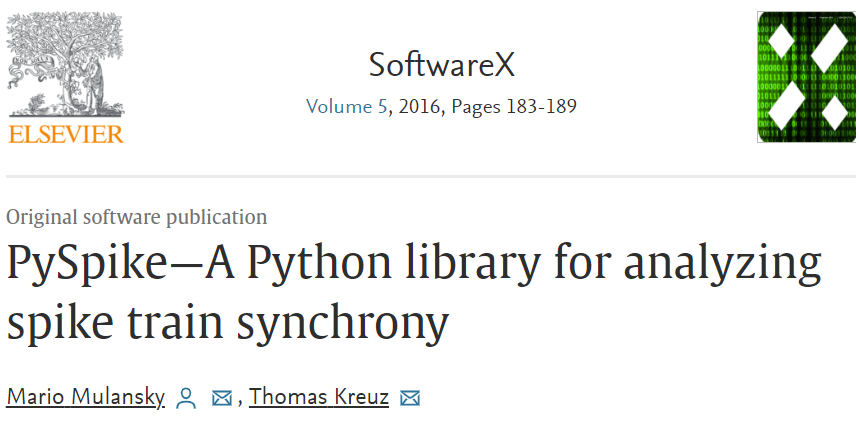

In [16]:
display.Image("../figures/ipynb_images/mulansky_2016.png")

### Simulate spike trains

Text(0.5, 1.0, 'Poisson spike train 2')

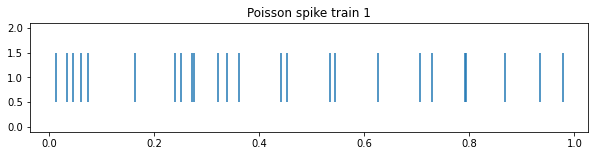

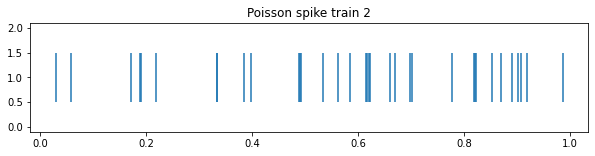

In [17]:
st1 = spk.generate_poisson_spikes(rate=30, interval=[0, 1])
st2 = spk.generate_poisson_spikes(rate=30, interval=[0, 1])

fig1, ax1 = plt.subplots(figsize=(10, 2))
ax1.eventplot(st1.spikes)
ax1.set_title("Poisson spike train 1")

fig2, ax2 = plt.subplots(figsize=(10, 2))
plt.eventplot(st2.spikes)
ax2.set_title("Poisson spike train 2")

### ISI-distance

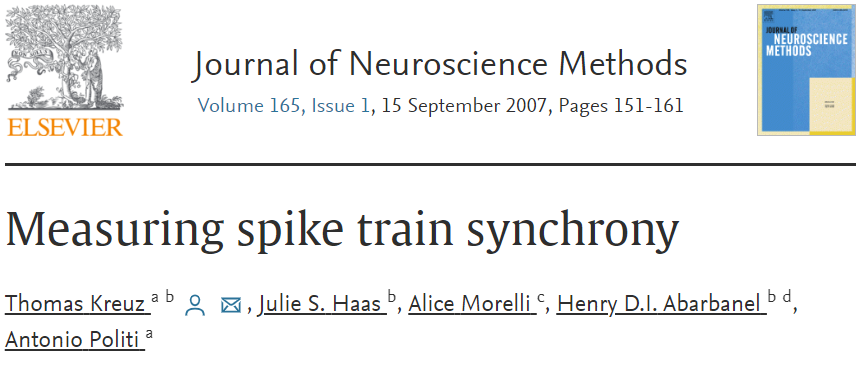

In [18]:
display.Image('../figures/ipynb_images/kruez_2007.png')

ISI-distance is computed as the ratio between the ISIs of two spike trains (at each time instance). This metric can also be used within a multivariate context.  
     
Advantages:
* Parameter free
* Timescale independent
* Firing-rate adaptive

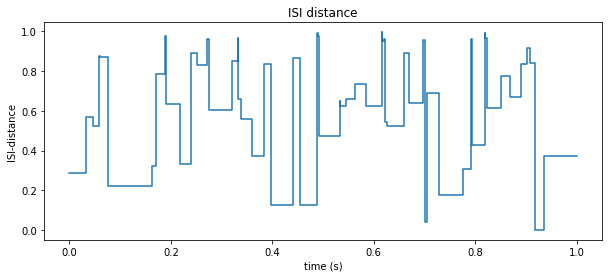

In [19]:
# compute ISI profile
isi_profile = spk.isi_profile(st1, st2)
t_isi_distance, isi_distance = isi_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_isi_distance, isi_distance)
ax.set(xlabel="time (s)", ylabel="ISI-distance")
ax.set_title("ISI distance")
plt.show()

### SPIKE-distance

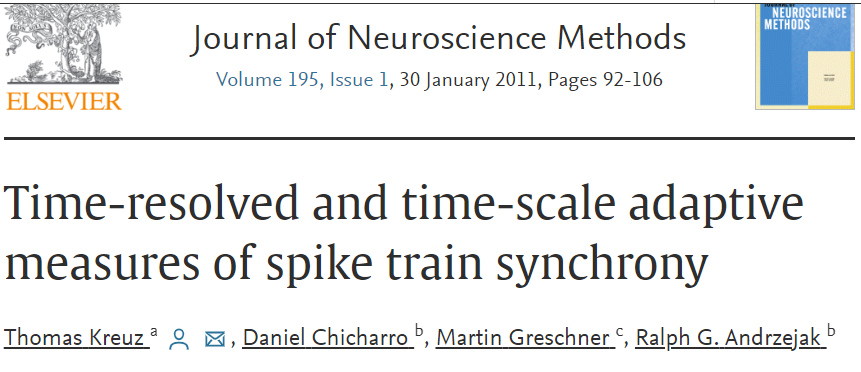

In [20]:
display.Image('../figures/ipynb_images/kruez_2011.png')

Advantages:
* Parameter free
* Timescale independent
* Firing-rate adaptive
  
Novelty: 
* Designed to be sensitive to coincident spikes
* Evaluated at each time step (while ISI-distance is evaluated at spike times)
  
Disadvantages:
* Can yield spuriously high values for event-like firing

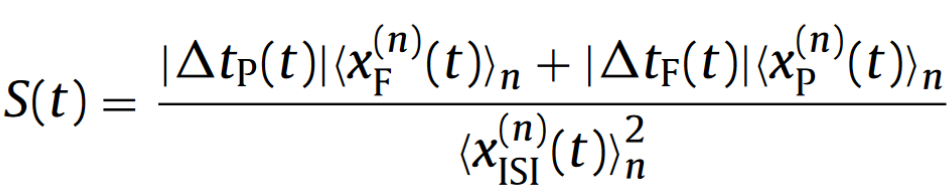

In [21]:
display.Image('../figures/ipynb_images/kruez_2011_eq9.png')

Equation 9.  
Kreuz T, Chicharro D, Greschner M, Andrzejak RG. Time-resolved and time-scale adaptive measures of spike train synchrony. J Neurosci Methods. 2011 Jan 30;195(1):92-106. doi: 10.1016/j.jneumeth.2010.11.020. Epub 2010 Dec 1. PMID: 21129402.

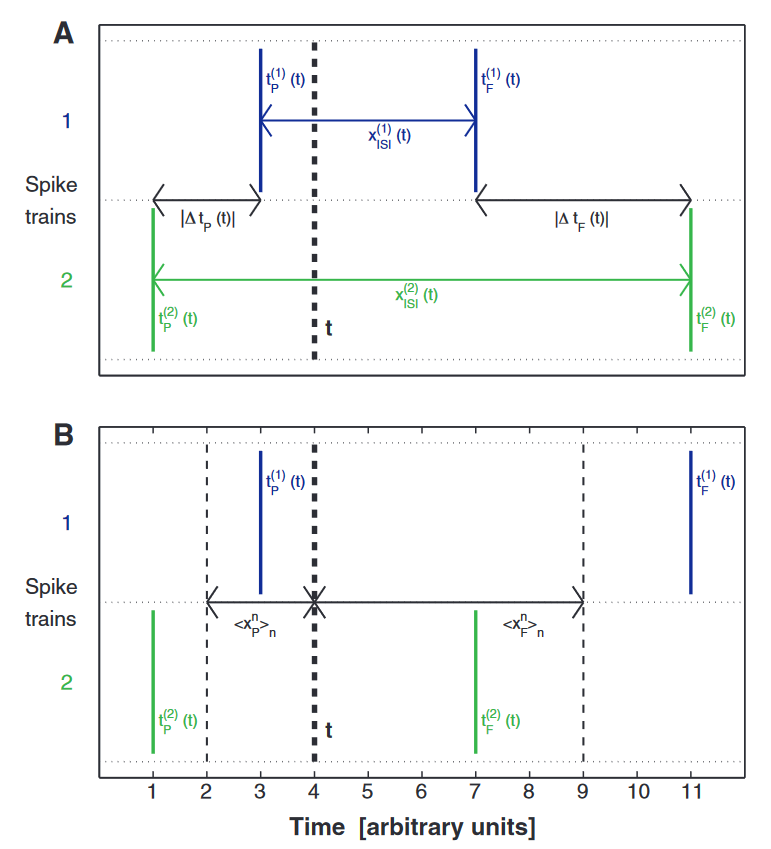

In [22]:
display.Image('../figures/ipynb_images/kruez_2011_fig1.png')

Figure 1.  
Kreuz T, Chicharro D, Greschner M, Andrzejak RG. Time-resolved and time-scale adaptive measures of spike train synchrony. J Neurosci Methods. 2011 Jan 30;195(1):92-106. doi: 10.1016/j.jneumeth.2010.11.020. Epub 2010 Dec 1. PMID: 21129402.

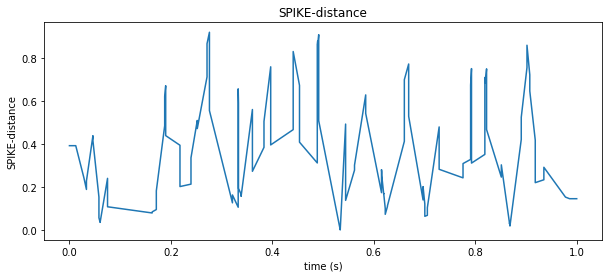

In [23]:
# compute SPIKE-distance profile
spike_dist_profile = spk.spike_profile(st1, st2)
t_spike_distance, spike_distance = spike_dist_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_spike_distance, spike_distance)
ax.set(xlabel="time (s)", ylabel="SPIKE-distance")
ax.set_title("SPIKE-distance")
plt.show()

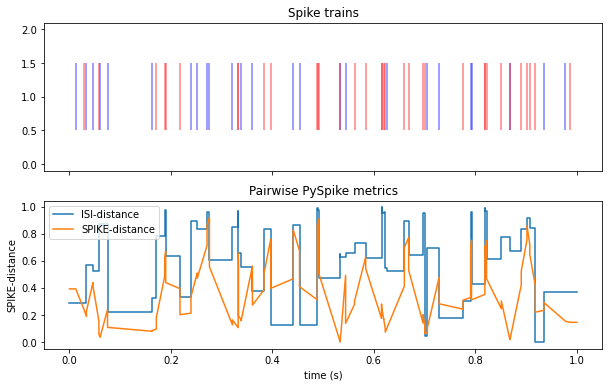

In [24]:
# Plot metric together

# create fig
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[10,6], sharex=True)

# plot spikes 
ax1.eventplot(st1.spikes, color='b', alpha=0.5)
ax1.eventplot(st2.spikes, color='r', alpha=0.5)
ax1.set_title("Spike trains")

# plot each metric
ax2.plot(t_isi_distance, isi_distance, label="ISI-distance")
ax2.plot(t_spike_distance, spike_distance, label="SPIKE-distance")

# label
ax2.set(xlabel="time (s)", ylabel="SPIKE-distance")
ax2.set_title("Pairwise PySpike metrics")
ax2.legend()

plt.show()

### SPIKE-synchronization

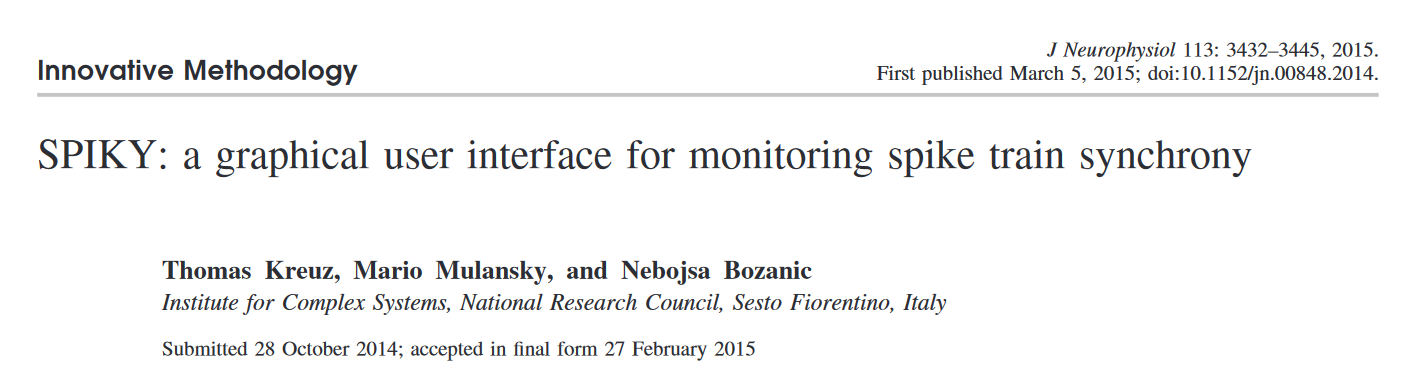

In [25]:
display.Image('../figures/ipynb_images/kruez_2015.png')

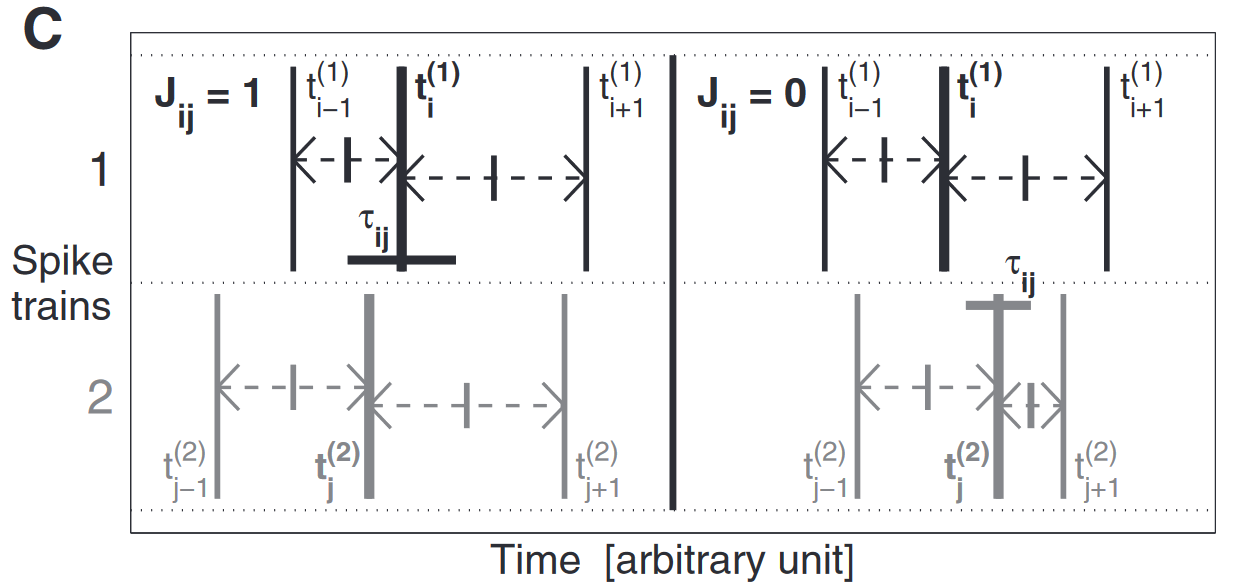

In [26]:
display.Image('../figures/ipynb_images/kruez_2015_fig1c.png')

Multivariate extension of event synchronization (Quian Quiroga et al. 2002)

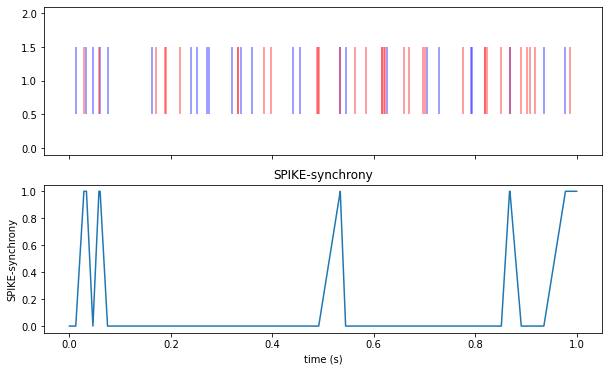

In [27]:
# compute SPIKE-synchrony profile
spike_sync_profile = spk.spike_sync_profile(st1, st2)
t_spike_synchrony, spike_synchrony = spike_sync_profile.get_plottable_data()

# plot
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[10,6], sharex=True)
ax1.eventplot(st1.spikes, color='b', alpha=0.5)
ax1.eventplot(st2.spikes, color='r', alpha=0.5)

ax2.plot(t_spike_synchrony, spike_synchrony)
ax2.set(xlabel="time (s)", ylabel="SPIKE-synchrony")
ax2.set_title("SPIKE-synchrony")
plt.show()

##### compare 3 metrics

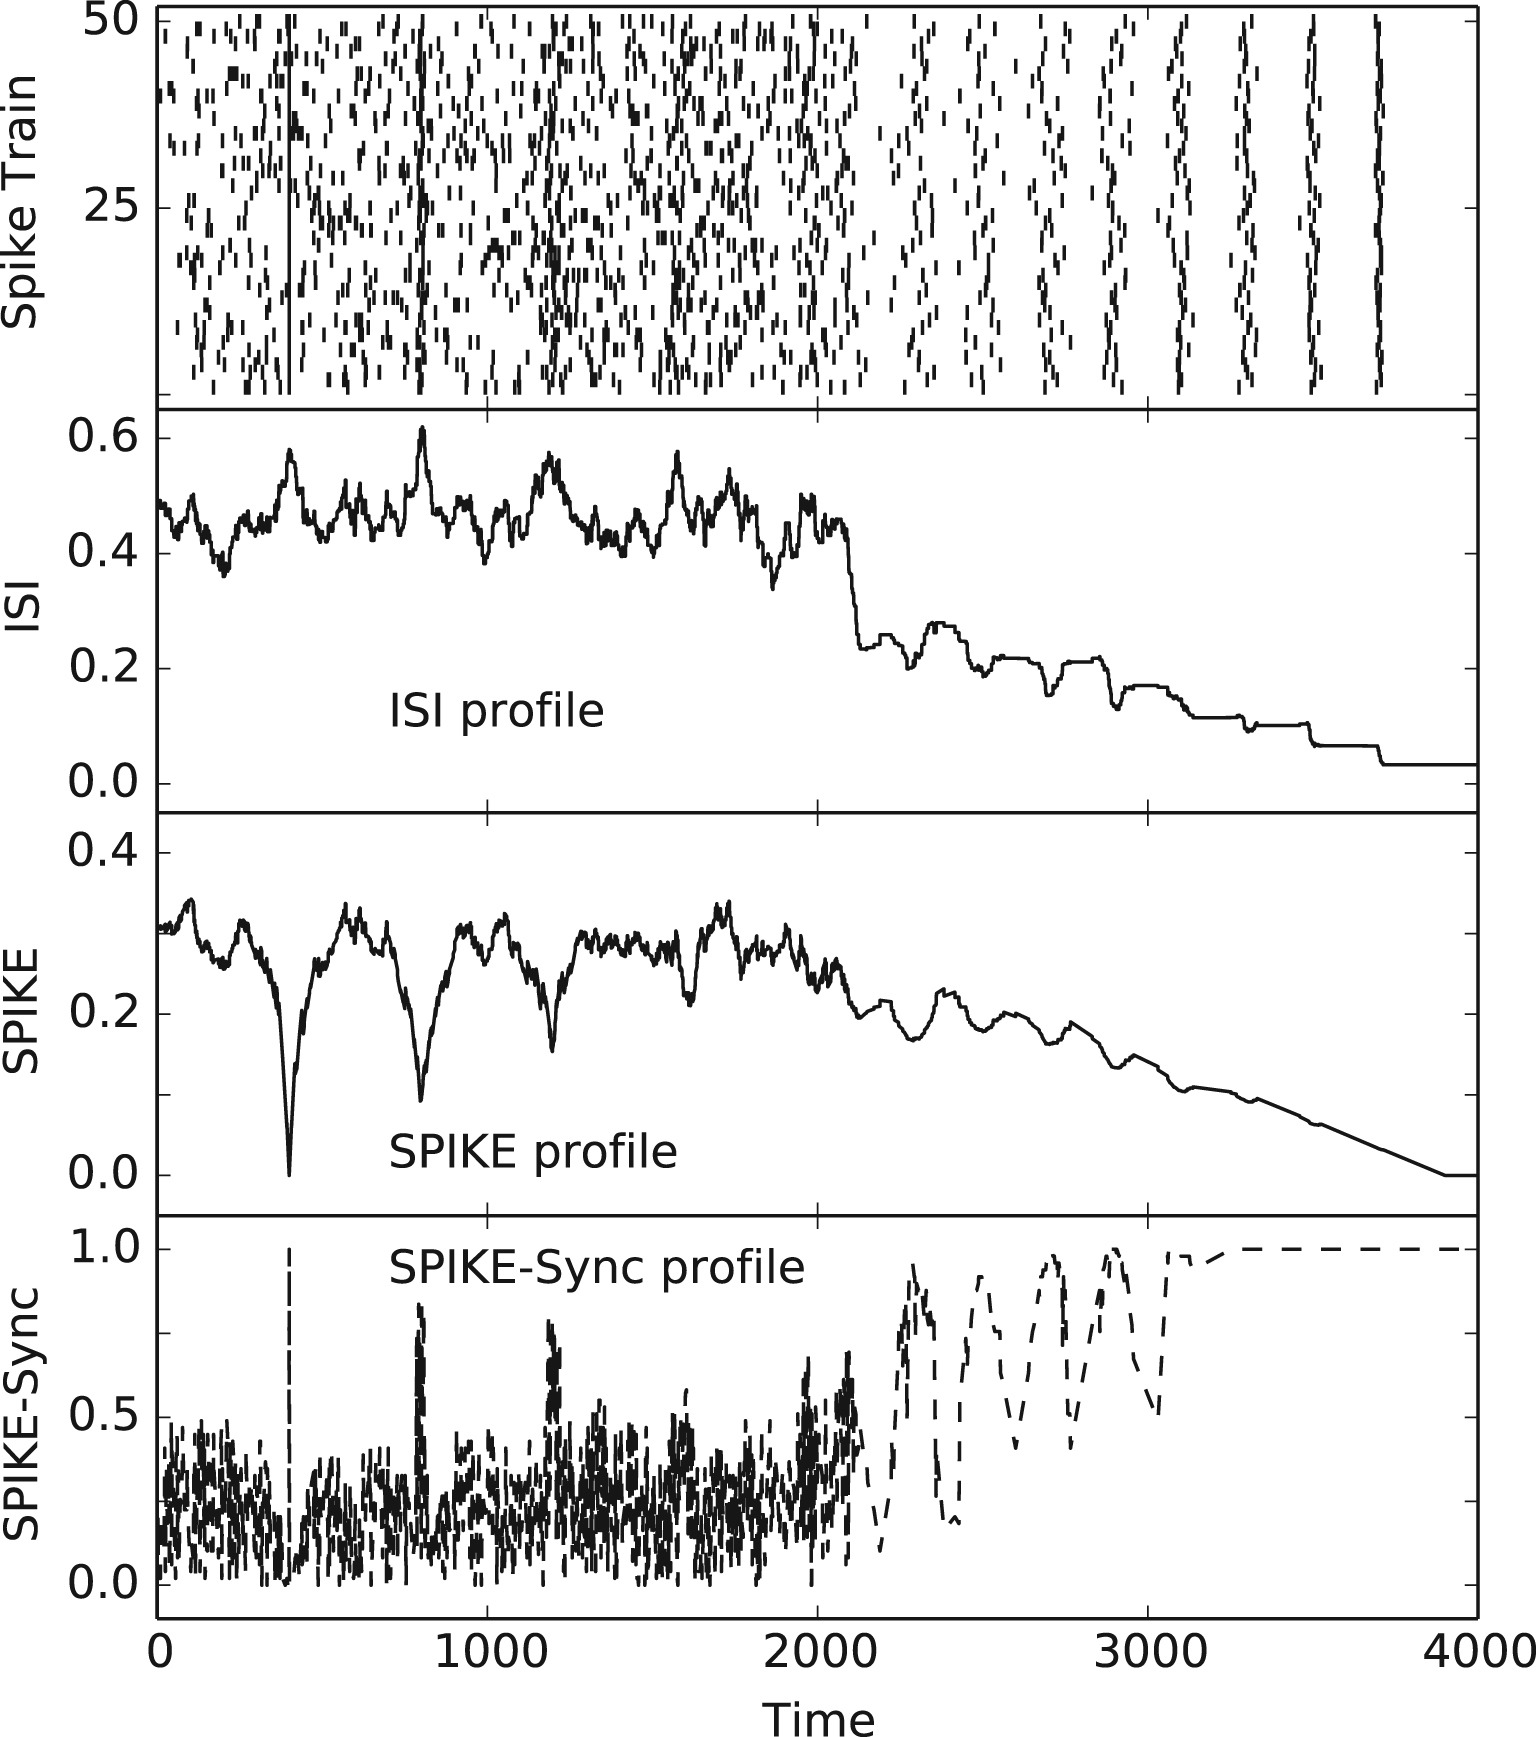

In [28]:
display.Image('../figures/ipynb_images/mulansky_2016_fig3.jpg')

Figure 3.  
Mario Mulansky, Thomas Kreuz, PySpike - A Python library for analyzing spike train synchrony, Software X 5, 183 (2016)

### Computing multivariate profiles and distances

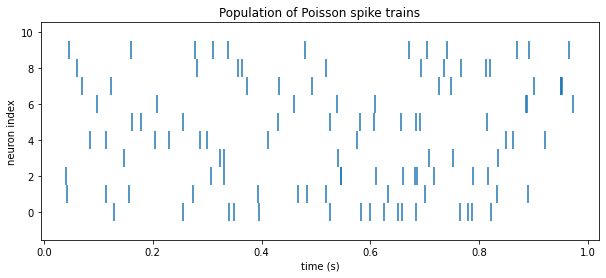

In [139]:
# simulate 10 spike trains
spike_trains = []
for i in range(10):
    spike_trains.append(spk.generate_poisson_spikes(rate=10, interval=[0, 1]))

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.eventplot(spike_trains)
ax.set_title("Population of Poisson spike trains")
ax.set_xlabel("time (s)")
ax.set_ylabel("neuron index")
plt.show()


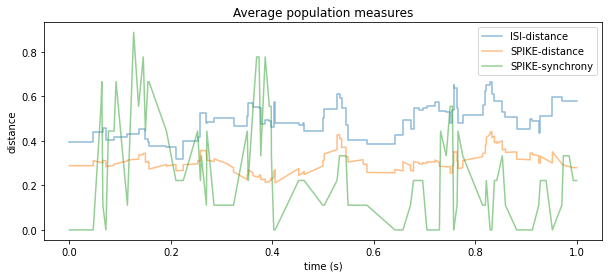

In [14]:
# average population measures

# compute
avrg_isi_profile = spk.isi_profile(spike_trains)
avrg_spike_profile = spk.spike_profile(spike_trains)
avrg_spike_sync_profile = spk.spike_sync_profile(spike_trains)

# get plottable data
t_avrg_isi_distance, avrg_isi_distance = avrg_isi_profile.get_plottable_data()
t_avrg_spike_distance, avrg_spike_distance = avrg_spike_profile.get_plottable_data()
t_avrg_spike_synchrony, avrg_spike_synchrony = avrg_spike_sync_profile.get_plottable_data()

# plot
fig, ax = plt.subplots(figsize=[10,4])
ax.plot(t_avrg_isi_distance, avrg_isi_distance, alpha=0.5, label="ISI-distance")
ax.plot(t_avrg_spike_distance, avrg_spike_distance, alpha=0.5, label="SPIKE-distance")
ax.plot(t_avrg_spike_synchrony, avrg_spike_synchrony, alpha=0.5, label="SPIKE-synchrony")
ax.set(xlabel="time (s)", ylabel="distance")
ax.set_title("Average population measures")
ax.legend()
plt.show()

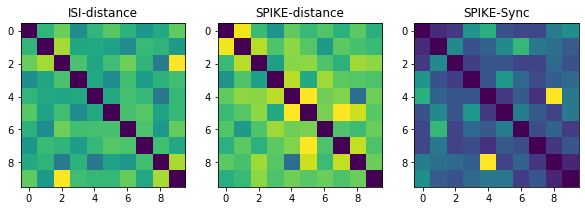

In [15]:
# pairwise measures

# compute
isi_distance = spk.isi_distance_matrix(spike_trains)
spike_distance = spk.spike_distance_matrix(spike_trains)
spike_sync = spk.spike_sync_matrix(spike_trains)

# plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=[10,4])

ax1.imshow(isi_distance, interpolation='none')
ax1.set_title("ISI-distance")

ax2.imshow(spike_distance, interpolation='none')
ax2.set_title("SPIKE-distance")

ax3.imshow(spike_sync, interpolation='none')
ax3.set_title("SPIKE-Sync")

plt.show()

### Empirical data analysis

In [52]:
# load example neural data (mouse V!, layer 4 in response to visual stimulation)
fname = "../data/example_spike_times.npy"
spiketrains = np.load(fname)
print(f"Shape of spiketrains: {spiketrains.shape}")
print(f"N trials: {spiketrains.shape[0]}")
print(f"N neurons: {spiketrains.shape[1]}")
print(f"Total spikes: {int(np.sum(spiketrains))}")

Shape of spiketrains: (47, 119, 1500)
N trials: 47
N neurons: 119
Total spikes: 52767


##### compute trial-wise population synchrony metrics

In [165]:
# # plot a few example trials
# for j_trial in range(30):
#     fig, ax = plt.subplots(figsize=(10, 3))
#     ax.imshow(spiketrains[:, j_trial], aspect='auto', cmap='binary')
#     ax.set_ylabel("neuron index")
#     ax.set_xlabel("time (ms)")
#     ax.set_title(f"Trial {j_trial}")

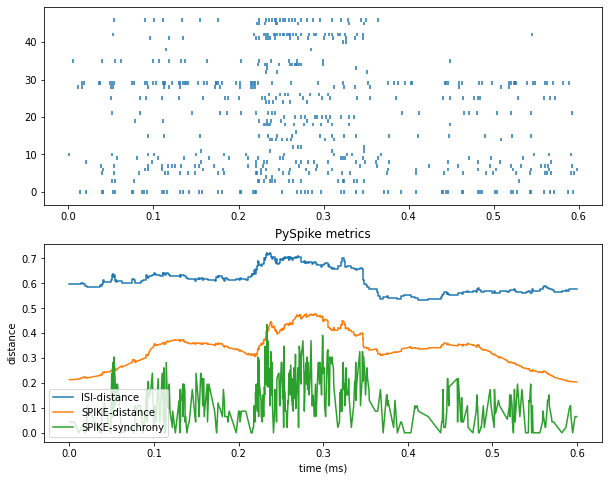

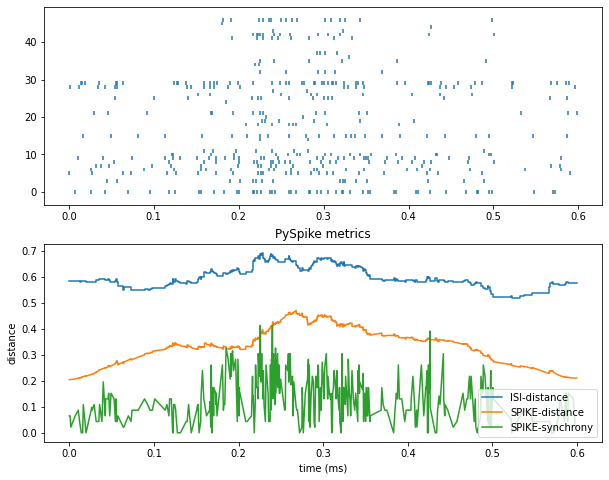

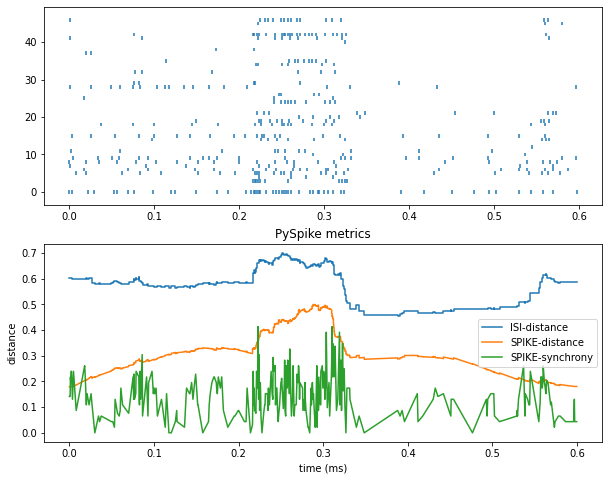

In [164]:
# compute synchrony metrics for an example trial

example_trials = [0, 17, 28]
for i_trial in example_trials:

    # create PySpike spike trains
    trial_spike_trains = spiketrains[:, i_trial]
    time = np.arange(trial_spike_trains.shape[1])/2500
    trial_spike_times = get_spike_times(trial_spike_trains, time)
    spike_trains = []
    for ii in range(trial_spike_trains.shape[0]):
        spike_trains.append(spk.SpikeTrain(trial_spike_times[ii], edges=[time[0], time[-1]]))


    # compute metrics
    isi_profile = spk.isi_profile(spike_trains)
    spike_profile = spk.spike_profile(spike_trains)
    spike_sync_profile = spk.spike_sync_profile(spike_trains)

    # get plottable data
    t_isi_distance, isi_distance = isi_profile.get_plottable_data()
    t_spike_distance, spike_distance = spike_profile.get_plottable_data()
    t_spike_synchrony, spike_synchrony = spike_sync_profile.get_plottable_data()

    # plot spikes
    fig, (ax0, ax) = plt.subplots(2,1, figsize=[10, 8])
    ax0.eventplot(spike_trains)

    # plot metrics
    ax.plot(t_isi_distance, isi_distance, label="ISI-distance")
    ax.plot(t_spike_distance, spike_distance, label="SPIKE-distance")
    ax.plot(t_spike_synchrony, spike_synchrony, label="SPIKE-synchrony")

    # label
    ax.set(xlabel="time (ms)", ylabel="distance")
    ax.set_title("PySpike metrics")
    ax.legend()

    plt.show()


##### compute across-trial metrics (variability)

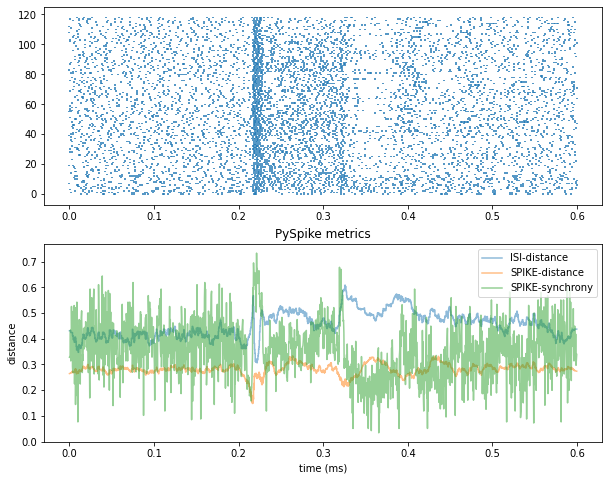

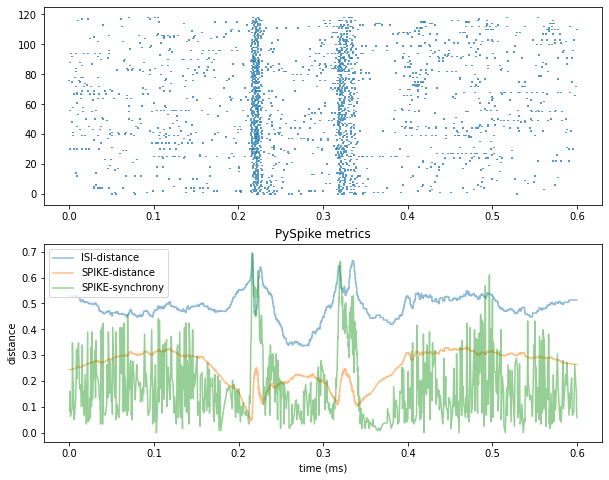

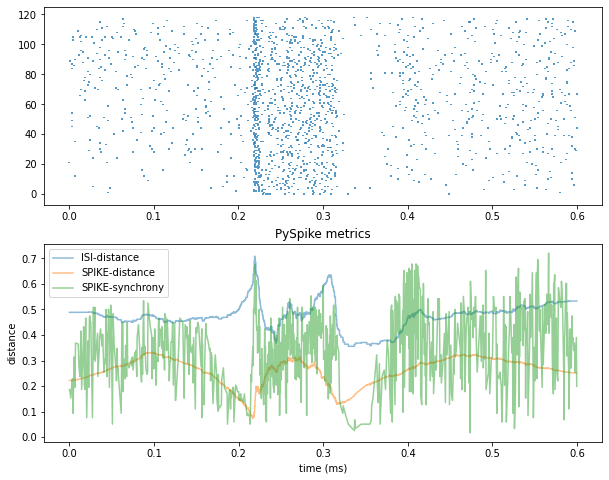

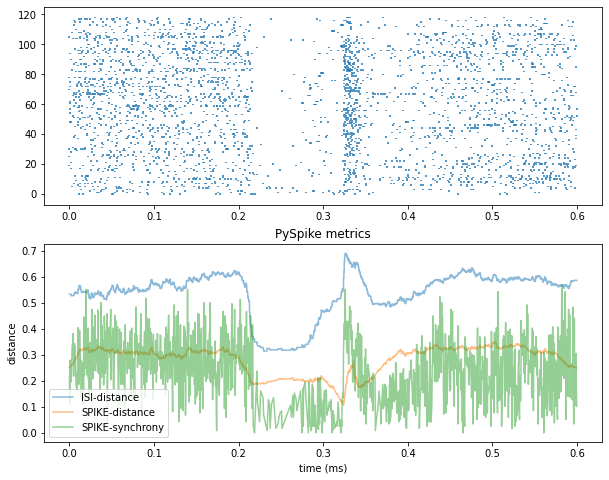

In [161]:
# compute across-trial measures

example_chans = [0, 3, 18, 28]
for i_unit in example_chans:
    # create PySpike spike trains
    unit_spike_trains = spiketrains[i_unit]
    time = np.arange(unit_spike_trains.shape[1])/2500
    unit_spike_times = get_spike_times(unit_spike_trains, time)
    spike_trains = []
    for ii in range(unit_spike_trains.shape[0]):
        spike_trains.append(spk.SpikeTrain(unit_spike_times[ii], edges=[time[0], time[-1]]))

    # compute metrics
    isi_profile = spk.isi_profile(spike_trains)
    spike_profile = spk.spike_profile(spike_trains)
    spike_sync_profile = spk.spike_sync_profile(spike_trains)

    # get plottable data
    t_isi_distance, isi_distance = isi_profile.get_plottable_data()
    t_spike_distance, spike_distance = spike_profile.get_plottable_data()
    t_spike_synchrony, spike_synchrony = spike_sync_profile.get_plottable_data()

    # plot spikes
    fig, (ax0, ax) = plt.subplots(2,1, figsize=[10, 8])
    ax0.eventplot(spike_trains)

    # plot metrics
    ax.plot(t_isi_distance, isi_distance, alpha=0.5, label="ISI-distance")
    ax.plot(t_spike_distance, spike_distance, alpha=0.5, label="SPIKE-distance")
    ax.plot(t_spike_synchrony, spike_synchrony, alpha=0.5, label="SPIKE-synchrony")

    # label
    ax.set(xlabel="time (ms)", ylabel="distance")
    ax.set_title("PySpike metrics")
    ax.legend()